In [2]:
from imp import reload
import sys
print(sys.version)
# import rpy2
import os
import os.path
import glob
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
# Use Type 1 fonts in plots.
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = False
# Do not wrap long lines
np.set_printoptions(linewidth=np.nan)
sns.set_style("whitegrid")
import runner
import umm

3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]


# Plotting the results of the experiments in the paper 
## Which value of $r_1$ (ratio_samples_learn) and $r_2$ (weight_samples_learn) is the best for each instance?

The learning rate $\rho$ (uBorda parameter) is **not** set manually. Instead, we use these two parameters to obtain a more interpretable setting: The value of $\rho$ is set at each iteration and depends on the set of function evaluations $F$. Parameter $\rho$ is set such that the largest $r_1$\% of the mass of the weights is concentrated in the best $r_2$\% of the solutions in $S$, i.e., 

$$
r_1 \sum_{\sigma\in S}\rho^{f(\sigma)} =  \sum_{\sigma\in S'}\rho^{f(\sigma)} \text{where} |S'| = r_2|S| \land \forall \sigma'\in S', \sigma\in S\setminus S' : f(\sigma')\geq f(\sigma)
$$


Therefore, for each instance, we plot the mean of the best fitnesses over 10 repetitions as a function of $r_1$ and $r_2$. Since we are minimizing, the lower the better. 

Overall, the values ($r_1, r_2$)=(.1,.9) have good performance, we will use this configuration for the rest of the experimental section. 

For the LOP instances (synthetic and real) the best fitness function changes smoothly when we change the parameters
For the QAP and PFSP this does not happen, meaning that the convergence to the optimal is not smooth

The following two cells perform the experiments, in particular:
- the first one run the whole combination of parameters (beware that this takes long because they are lots of executions) and we do not recomment to run here and
- the second one processes the results and generates the plots

In [3]:
# dfselected = pd.read_csv('./best_fitness_selected.txt',sep='\t')
# lis = []
# for inst in dfselected.instance_name.values:#collect all the instance paths
#   for folder in ['./lop/','./pfsp/', './qap/']: 
#       for dirpath, dirnames, filenames in os.walk(folder):
#           for filename in [f for f in filenames ]:
#             if inst in os.path.join(dirpath, filename):
#                 lis.append(os.path.join(dirpath, filename))    
# budget=40#0
# m_ini=10
# budgetMM=10
# res = []
# for instance_name in lis:
#   for r1 in [.1,.2,.3,.4,.5]:
#     for r2 in [.6,.7,.8,.9,.99]:
#       for seed in range(1):
#         out_filename = "pickles/"+instance_name.replace("/", "__").replace(".txt", "")
#         df = runner.run_once("UMM", instance_name, seed,budget = budget, m_ini = m_ini, budgetMM = budgetMM, 
#                              ratio_samples_learn = r1, weight_mass_learn = r2, out_filename = out_filename)
#         print(out_filename,r1, r2,df.Fitness.min())
#         res.append([out_filename,ratio_samples_learn, weight_mass_learn,df.Fitness.min()])
#         #os.remove(out_filename)
# FIXME: This does not generate results/results.csv

N-atp111


findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


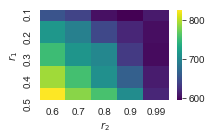

N-atp134


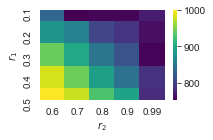

N-be75eec-150


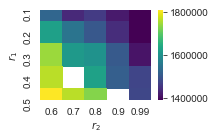

N-be75np-150


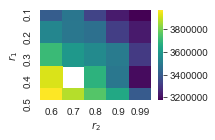

N-p50-01


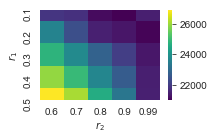

N-p50-02


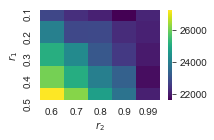

N-t1d100.01


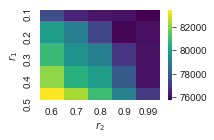

N-t1d100.02


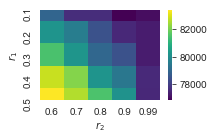

N-t1d150.01


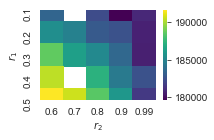

N-t1d150.02


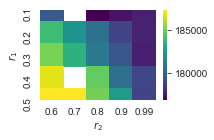

N-t2d150.01


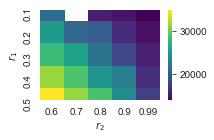

N-t2d150.02


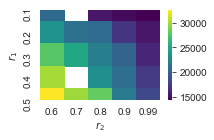

kra32.dat


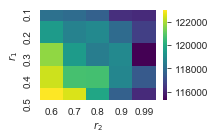

nug12.dat


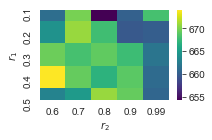

nug30.dat


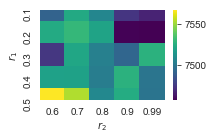

rec05


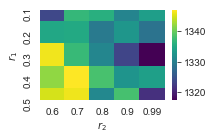

rec13


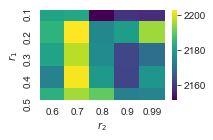

rec19


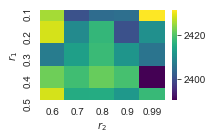

rec31


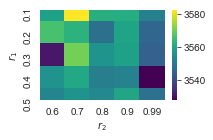

tho30.dat


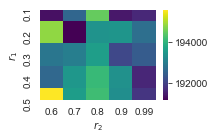

In [2]:
df = pd.read_csv('results/results.csv',index_col=0)
df.columns = [c if c!='min' else 'best' for c in df.columns]
df = pd.pivot_table(df,index=['filename','ratio','weight'],values='best',aggfunc={np.mean,np.min, np.std})#.reset_index()
df.columns = ['best_'+ c for c in df.columns]
dfres = df.reset_index()
dfres
for instance_name in dfres.filename.drop_duplicates().values:
    print(instance_name, )
    plt.figure(figsize=(3,2))
    sns.set_style("whitegrid")
    square = dfres[dfres.filename == instance_name].pivot_table(index='ratio', columns='weight', values='best_mean')
    sns.heatmap(square, cmap="viridis")
    plt.tight_layout()
    plt.xlabel(r'$r_2$')
    plt.ylabel(r'$r_1$')
    plt.savefig('img/heatmap_'+instance_name.replace('.','_')+'.pdf')
    plt.show()

## Synthetic datasets (LOP)


  The instances $M$ follow this distribution $M_\phi[i,j]$
  $$M_\phi[i,j] = h(j-i+1,\phi) - h(j-i,\phi),$$ where $$h(k,\phi)=\frac{k}{1-\phi^k} \enspace.$$
  
Taking different values of $\phi$ we controll the uniformity of $M$.
  
In the next cell we plot the results over the synthetic instances

In [2]:
# Compare synthetic data in the same plot.
# Compare the convergence to lowest fitness funtion values by the two solvers
lis = []
for filename in glob.glob("./results/LOP-synthetic*/*.pkl.gz"):
    lis.append(pd.read_pickle(filename))
df = pd.concat(lis)
df['Uniformity'] = df.instance.str.extract(r'phi=(.+)$').astype(float)
df

,rho,phi_estim,phi_sample,Distance,Fitness,x,m_ini,seed,budget,budgetMM,ratio_samples_learn,weight_mass_learn,Function evaluations,run_time,Problem,instance,Solver,budgetGA,Uniformity
0,NaN,NaN,NaN,0.463158,0.926395,"[2, 5, 17, 19, 12, 1, 11, 10, 13, 18, 7, 4, 8,...",10,5,400,10.0,0.1,0.9,1,280.513855,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.7",UMM,NaN,0.7
1,NaN,NaN,NaN,0.615789,1.382990,"[3, 12, 8, 17, 4, 6, 13, 19, 5, 0, 7, 2, 18, 1...",10,5,400,10.0,0.1,0.9,2,280.513855,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.7",UMM,NaN,0.7
2,NaN,NaN,NaN,0.410526,0.822328,"[12, 11, 0, 15, 16, 13, 10, 8, 17, 7, 5, 1, 18...",10,5,400,10.0,0.1,0.9,3,280.513855,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.7",UMM,NaN,0.7
3,NaN,NaN,NaN,0.494737,1.064624,"[17, 8, 4, 16, 11, 13, 19, 12, 2, 5, 15, 6, 9,...",10,5,400,10.0,0.1,0.9,4,280.513855,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.7",UMM,NaN,0.7
4,NaN,NaN,NaN,0.542105,1.144920,"[10, 11, 18, 1, 3, 4, 16, 8, 9, 13, 6, 19, 7, ...",10,5,400,10.0,0.1,0.9,5,280.513855,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.7",UMM,NaN,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,0.605263,1.287581,"[7, 0, 12, 11, 19, 13, 16, 5, 3, 15, 2, 1, 8, ...",10,6,400,NaN,NaN,NaN,396,134605.041842,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.5",CEGO,1000.0,0.5
396,NaN,NaN,NaN,0.505263,1.059671,"[7, 0, 3, 11, 4, 12, 8, 2, 14, 6, 10, 9, 18, 1...",10,6,400,NaN,NaN,NaN,397,134605.041842,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.5",CEGO,1000.0,0.5
397,NaN,NaN,NaN,0.463158,0.942619,"[0, 13, 1, 3, 2, 7, 5, 4, 14, 19, 9, 10, 18, 1...",10,6,400,NaN,NaN,NaN,398,134605.041842,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.5",CEGO,1000.0,0.5
398,NaN,NaN,NaN,0.542105,1.151401,"[3, 1, 12, 6, 15, 10, 2, 8, 0, 7, 17, 5, 19, 4...",10,6,400,NaN,NaN,NaN,399,134605.041842,LOP,"LOP-synthetic,seed=123456,n=20,m=200,phi=0.5",CEGO,1000.0,0.5


findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.
findfont: Font family ['sans-serif'] not found. Falling back to Helvetica.


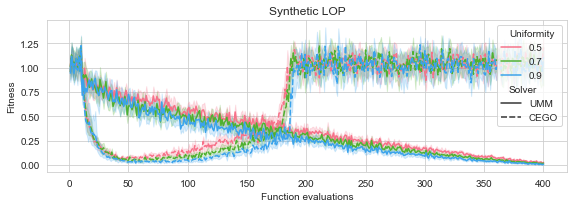

In [3]:
color_variable = 'Uniformity'
y_variables = ['Fitness']
palette = sns.color_palette("husl", len(df[color_variable].drop_duplicates()))
for y_variable in y_variables:
    plt.figure(figsize=(8,3))
    g = sns.lineplot(x='Function evaluations',y=y_variable,style='Solver', hue=color_variable,data=df, palette=palette)
    g.set_title('Synthetic LOP')
    plt.tight_layout()
    plt.savefig('img/synthetic_LOP_combined.pdf')
    plt.show()

## Real datasets (LOP, QAP, PFSP)
In the following lines we load the results of the real dataset for CEGO and UMM, plot the results and make the comparison table

In [8]:
lis = []
for folder in ['results/lop/','results/pfsp/', 'results/qap/']: 
    for dirpath, dirnames, filenames in os.walk(folder):
        for filename in [f for f in filenames if f.endswith(".pkl.gz")]:
            lis.append(pd.read_pickle(os.path.join(dirpath, filename)))
dfreal = pd.concat(lis)
selected = pd.read_csv('best_fitness_selected.txt', sep='\s+', comment='#')
print(selected.instance_name)
# Only include selected data.
dfreal = dfreal[dfreal.instance.str.contains('|'.join(selected.instance_name))]
dfreal

0       N-t1d100.01
1       N-t1d100.02
2       N-t1d150.01
3       N-t1d150.02
4       N-t1d200.01
5       N-t1d200.02
6       N-t2d150.01
7       N-t2d150.02
8       N-t2d200.01
9       N-t2d200.02
10         N-p50-01
11         N-p50-02
12    N-be75eec_150
13     N-be75np_150
14    N-be75eec_250
15     N-be75np_250
16         N-atp111
17         N-atp134
18            tho30
19           kra30a
20           kra30b
21            kra32
22            nug30
23            nug12
24            rec05
25            rec13
26            rec19
Name: instance_name, dtype: object


,rho,phi_estim,phi_sample,Distance,Fitness,x,m_ini,seed,budget,budgetMM,ratio_samples_learn,weight_mass_learn,Function evaluations,run_time,Problem,instance,Solver,budgetGA
0,NaN,NaN,NaN,NaN,957.0,"[37, 42, 74, 17, 23, 10, 90, 45, 57, 6, 59, 35...",10,5,400,10.0,0.1,0.9,1,7888.316719,LOP,lop/Spec/N-atp111,UMM,NaN
1,NaN,NaN,NaN,NaN,980.0,"[73, 7, 26, 11, 47, 6, 93, 46, 3, 37, 77, 44, ...",10,5,400,10.0,0.1,0.9,2,7888.316719,LOP,lop/Spec/N-atp111,UMM,NaN
2,NaN,NaN,NaN,NaN,931.0,"[73, 87, 86, 50, 2, 40, 66, 0, 99, 48, 104, 3,...",10,5,400,10.0,0.1,0.9,3,7888.316719,LOP,lop/Spec/N-atp111,UMM,NaN
3,NaN,NaN,NaN,NaN,930.0,"[91, 34, 100, 7, 4, 39, 78, 75, 16, 56, 40, 57...",10,5,400,10.0,0.1,0.9,4,7888.316719,LOP,lop/Spec/N-atp111,UMM,NaN
4,NaN,NaN,NaN,NaN,901.0,"[25, 40, 22, 101, 68, 14, 62, 81, 8, 85, 104, ...",10,5,400,10.0,0.1,0.9,5,7888.316719,LOP,lop/Spec/N-atp111,UMM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,NaN,NaN,NaN,NaN,834.0,"[8, 5, 9, 7, 4, 11, 3, 6, 0, 1, 10, 2]",10,6,400,NaN,NaN,NaN,396,52692.456793,QAP,qap/nug12.dat,CEGO,1000.0
396,NaN,NaN,NaN,NaN,696.0,"[6, 7, 5, 3, 8, 10, 4, 9, 11, 1, 2, 0]",10,6,400,NaN,NaN,NaN,397,52692.456793,QAP,qap/nug12.dat,CEGO,1000.0
397,NaN,NaN,NaN,NaN,708.0,"[9, 7, 10, 3, 4, 5, 8, 6, 1, 2, 11, 0]",10,6,400,NaN,NaN,NaN,398,52692.456793,QAP,qap/nug12.dat,CEGO,1000.0
398,NaN,NaN,NaN,NaN,752.0,"[9, 6, 10, 3, 5, 7, 8, 1, 2, 4, 11, 0]",10,6,400,NaN,NaN,NaN,399,52692.456793,QAP,qap/nug12.dat,CEGO,1000.0


0       N-t1d100.01
1       N-t1d100.02
2       N-t1d150.01
3       N-t1d150.02
4       N-t1d200.01
5       N-t1d200.02
6       N-t2d150.01
7       N-t2d150.02
8       N-t2d200.01
9       N-t2d200.02
10         N-p50-01
11         N-p50-02
12    N-be75eec_150
13     N-be75np_150
14    N-be75eec_250
15     N-be75np_250
16         N-atp111
17         N-atp134
18            tho30
19           kra30a
20           kra30b
21            kra32
22            nug30
23            nug12
24            rec05
25            rec13
26            rec19
27            rec31
Name: instance_name, dtype: object
Instance:  kra32
Saving to img/fitness_real_qap_kra32_dat.pdf


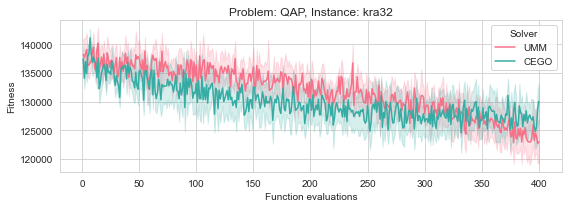

Instance:  kra30a
Saving to img/fitness_real_qap_kra30a_dat.pdf


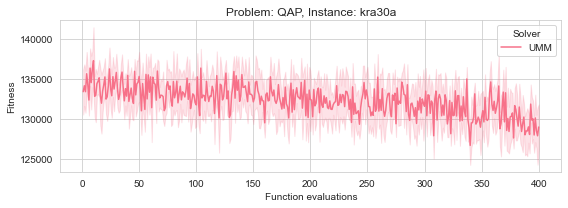

Instance:  kra30b
Saving to img/fitness_real_qap_kra30b_dat.pdf


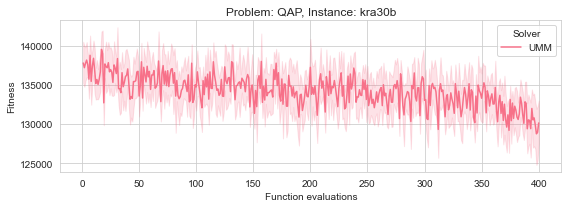

In [17]:
for inst in ['kra32','kra30a','kra30b']:# selected.instance_name:
    print("Instance: ", inst)
    df = dfreal[dfreal.instance.str.contains(inst)]
    if len(df) == 0: 
        print("No data for {inst}")
        continue
    plt.figure(figsize=(8,3))
    palette = sns.color_palette("husl", len(df['Solver'].drop_duplicates()))
    g = sns.lineplot(x='Function evaluations',y='Fitness',hue='Solver',data=df, palette=palette)
    g.set_title('Problem: '+df.Problem.iloc[0]+', Instance: '+ inst)
    plt.tight_layout()
    filename = 'img/fitness_real_'+df.instance.iloc[0].replace('/','_').replace('.','_')+'.pdf'
    print("Saving to " + filename)
    plt.savefig(filename)
    plt.show()

## Summary of the results

Table with the summary of the results

In [9]:
# The maximum time per seed and evaluation is the final time. 
dftime = dfreal.groupby(['Solver','Problem','instance','seed']).run_time.max()
# Then we calculate the mean per instance.
dftime = dftime.groupby(['Solver','Problem','instance']).mean().reset_index()
# Convert to hours
dftime['run_time'] =  (dftime['run_time'] / 3600.0).round(1)
dftime = dftime.pivot(index=['Problem','instance'], columns='Solver',values='run_time')
dftime.rename(columns={'CEGO':'CEGO Runtime', 'UMM':'UMM Runtime'}, inplace=True)

# FEvals of CEGO
tmp = dfreal[dfreal['Solver'] == 'CEGO'].groupby(['Problem','instance','seed'])['Function evaluations'].max()
dftime['CEGO F. evaluations'] = tmp.groupby(['Problem','instance']).mean()

# Fitness
df_fitness = dfreal.groupby(['Solver', 'Problem','instance','seed']).Fitness.min().reset_index()
tmp_cego = df_fitness[df_fitness.Solver == 'CEGO'].groupby(['Problem','instance']).Fitness.agg(Fitness_CEGO_mean='mean', Fitness_CEGO_std='std').reset_index()
tmp_umm = df_fitness[df_fitness.Solver == 'UMM'].groupby(['Problem','instance']).Fitness.agg(Fitness_UMM_mean='mean', Fitness_UMM_std='std').reset_index()
df = pd.merge(tmp_cego, tmp_umm)
# Fix instance names
df['Instance'] = [i[-1] for i in df.instance.str.split('/').values]
df['CEGO fitness'] = df.Fitness_CEGO_mean.round(1).astype(str) + " (" + df.Fitness_CEGO_std.round(1).astype(str) + ")"
df['UMM fitness'] = df.Fitness_UMM_mean.round(1).astype(str) + " (" + df.Fitness_UMM_std.round(1).astype(str) + ")"
df = df.drop(['Fitness_CEGO_mean', 'Fitness_CEGO_std', 'Fitness_UMM_mean', 'Fitness_UMM_std'], axis=1)
df = pd.merge(df, dftime, on=['Problem', 'instance'])
df

for inst in df.instance:
    x, y = [ f.to_numpy() for _, f in df_fitness[df_fitness.instance == inst].groupby('Solver').Fitness]
    cm = sms.CompareMeans(sms.DescrStatsW(x), sms.DescrStatsW(y))
    df.loc[df.instance == inst, 'Confidence interval'] = str(tuple([i.round(1) for i in cm.tconfint_diff(usevar='unequal')]))

# Keep only some columns
df = df[['Problem', 'Instance','UMM fitness', 'CEGO fitness',	'Confidence interval',	'UMM Runtime',	'CEGO Runtime',	'CEGO F. evaluations']]
df

,Problem,Instance,UMM fitness,CEGO fitness,Confidence interval,UMM Runtime,CEGO Runtime,CEGO F. evaluations
0,LOP,N-t1d100.01,76499.3 (1099.7),78012.0 (432.1),"(696.4, 2329.0)",1.9,145.1,158.3
1,LOP,N-t1d100.02,76860.7 (864.0),78834.0 (477.8),"(1303.8, 2642.8)",1.8,144.7,156.0
2,LOP,N-t1d150.01,179615.6 (1731.5),186969.0 (2094.6),"(5543.3, 9163.5)",4.4,145.7,103.9
3,LOP,N-t1d150.02,177524.2 (1165.6),183414.7 (779.2),"(4949.2, 6831.8)",4.6,145.3,103.6
4,LOP,N-t1d200.01,323501.4 (1385.7),333804.1 (1191.9),"(9086.4, 11519.0)",7.6,145.4,77.7
5,LOP,N-t1d200.02,319786.2 (2265.6),331730.9 (2819.7),"(9533.6, 14355.8)",7.1,145.9,78.2
6,LOP,N-t2d150.01,15136.9 (745.9),22207.3 (1667.3),"(5817.1, 8323.7)",4.5,145.5,104.5
7,LOP,N-t2d150.02,14718.4 (677.5),22036.0 (744.7),"(6648.3, 7986.9)",4.5,145.0,103.1
8,LOP,N-t2d200.01,33389.0 (1984.0),54043.6 (1477.6),"(19001.4, 22307.8)",7.4,146.7,78.2
9,LOP,N-t2d200.02,35589.0 (2319.6),52787.0 (4194.2),"(13948.0, 20448.0)",7.5,145.7,78.9


In [8]:
print(df.to_latex(index=False))

\begin{tabular}{lllllrrr}
\toprule
Problem &       Instance &           UMM fitness &           CEGO fitness &     Confidence interval &  UMM Runtime &  CEGO Runtime &  CEGO F. evaluations \\
\midrule
    LOP &    N-t1d100.01 &      76499.3 (1099.7) &        78012.0 (432.1) &         (696.4, 2329.0) &          1.9 &         145.1 &                158.3 \\
    LOP &    N-t1d100.02 &       76860.7 (864.0) &        78834.0 (477.8) &        (1303.8, 2642.8) &          1.8 &         144.7 &                156.0 \\
    LOP &    N-t1d150.01 &     179615.6 (1731.5) &      186969.0 (2094.6) &        (5543.3, 9163.5) &          4.4 &         145.7 &                103.9 \\
    LOP &    N-t1d150.02 &     177524.2 (1165.6) &       183414.7 (779.2) &        (4949.2, 6831.8) &          4.6 &         145.3 &                103.6 \\
    LOP &    N-t1d200.01 &     323501.4 (1385.7) &      333804.1 (1191.9) &       (9086.4, 11519.0) &          7.6 &         145.4 &                 77.7 \\
    LOP &    N

### Plot of computation times ###

In [13]:
umm_runtime = (dfumm.groupby("instance")["run_time"].mean()/3600.0).round(1).reset_index()
cego_runtime = (dfcego.groupby("instance")["run_time"].mean()/3600.0).round(1).reset_index()
run_time = pd.merge(umm_runtime,cego_runtime, on="instance", suffixes=['_umm','_cego'])
run_time


,instance,run_time_umm,run_time_cego
0,lop/RandA1/N-t1d100.01,3.2,145.1
1,lop/RandA1/N-t1d100.02,3.2,144.7
2,lop/RandA1/N-t1d150.01,6.5,145.7
3,lop/RandA1/N-t1d150.02,6.5,145.3
4,lop/RandA1/N-t1d200.01,10.7,145.4
5,lop/RandA1/N-t1d200.02,10.6,146.0
6,lop/RandA2/N-t2d150.01,7.0,145.5
7,lop/RandA2/N-t2d150.02,7.1,145.0
8,lop/RandA2/N-t2d200.01,11.2,146.7
9,lop/RandA2/N-t2d200.02,11.2,145.7
